# Transform testing
> Transform testing


- skip_showdoc: true
- skip_exec: true

In [ ]:
from torchvision import tv_tensors  # we'll describe this a bit later, bare with us
from torchvision.transforms import v2
from torchvision.io import read_image

from pathlib import Path
import torch
import matplotlib.pyplot as plt
plt.rcParams["savefig.bbox"] = 'tight'

torch.manual_seed(1)

from helpers import plot

In [ ]:
target = {'boxes' : tv_tensors.BoundingBoxes(
    [
        [15, 10, 370, 510],
        [275, 340, 510, 510],
        [130, 345, 210, 425]
    ],
    format="XYXY", canvas_size=img.shape[-2:]),
          'labels': torch.tensor([ 6,  1])}
target

{'boxes': BoundingBoxes([[ 15,  10, 370, 510],
                [275, 340, 510, 510],
                [130, 345, 210, 425]], format=BoundingBoxFormat.XYXY, canvas_size=torch.Size([512, 512])),
 'labels': tensor([6, 1])}

In [ ]:
img = read_image(str('astronaut(1).jpg'))
print(f"{type(img) = }, {img.dtype = }, {img.shape = }")

type(img) = <class 'torch.Tensor'>, img.dtype = torch.uint8, img.shape = torch.Size([3, 512, 512])


<class 'torchvision.tv_tensors._bounding_boxes.BoundingBoxes'> <class 'dict'>


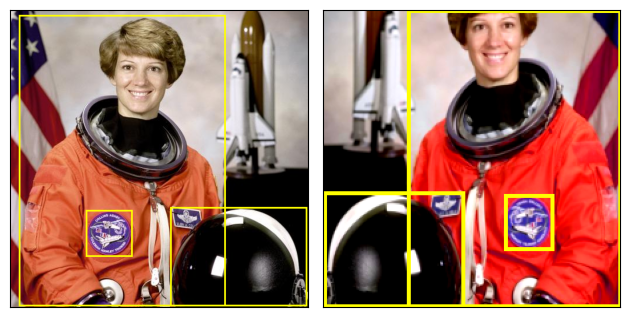

In [ ]:
boxes = tv_tensors.BoundingBoxes(
    [
        [15, 10, 370, 510],
        [275, 340, 510, 510],
        [130, 345, 210, 425]
    ],
    format="XYXY", canvas_size=img.shape[-2:])

transforms = v2.Compose([
    v2.RandomResizedCrop(size=(224, 224), antialias=True),
    v2.RandomPhotometricDistort(p=1),
    v2.RandomHorizontalFlip(p=1),
])
out_img, out_boxes = transforms(img, target)
print(type(boxes), type(out_boxes))

plot([(img, boxes), (out_img, out_boxes)])

## COCO

In [ ]:
import torchvision
from torchvision import models, datasets, tv_tensors, transforms
from torchvision.transforms import v2, ToPILImage
from torchvision.datasets import VisionDataset, CocoDetection
from torchinfo import summary
import torch.utils.data
from torch.utils.data import DataLoader

import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
train_path = './Data/coco/train'
val_path = './Data/coco/validation'

# Load KITTI train dataset
train_dataset = CocoDetection(root=f'{train_path}/data',
                              annFile=f'{train_path}/labels.json', 
                              )

# Load KITTI test dataset
test_dataset = CocoDetection(root=f'{val_path}/data',
                            annFile=f'{val_path}/labels.json',
                            )

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [ ]:
train_dataset2 = datasets.wrap_dataset_for_transforms_v2(train_dataset, target_keys=("boxes", "labels"))

test_dataset2 = datasets.wrap_dataset_for_transforms_v2(test_dataset, target_keys=("boxes", "labels"))

In [ ]:
train_dataset2[1][1]

{'boxes': BoundingBoxes([[  2.2600,  93.7700,  68.4000, 251.6300],
                [261.0000, 139.8800, 312.7500, 309.3800],
                [ 17.2900, 142.1600,  40.9600, 170.0100],
                [238.4300, 175.2500, 271.5800, 190.9800],
                [332.2800, 232.1600, 375.7300, 293.8800],
                [373.9400, 222.9900, 402.2900, 292.7100],
                [334.7200, 205.5700, 395.5000, 245.5300]], format=BoundingBoxFormat.XYXY, canvas_size=(333, 500)),
 'labels': tensor([ 6,  1,  1,  3, 33, 33, 33])}

<class 'torchvision.tv_tensors._bounding_boxes.BoundingBoxes'> <class 'dict'>


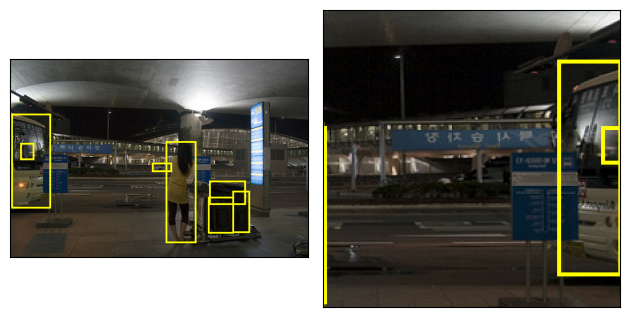

In [ ]:
transforms = v2.Compose([
    v2.RandomResizedCrop(size=(224, 224), antialias=True),
    v2.RandomPhotometricDistort(p=1),
    v2.RandomHorizontalFlip(p=1),
])
out_img, out_boxes = transforms(train_dataset2[1][0], train_dataset2[1][1])
print(type(boxes), type(out_boxes))

plot([(train_dataset2[1][0], train_dataset2[1][1]), (out_img, out_boxes)])